# Assignment 2

Hanifi Aslankarayiğit 2200356031
Mustafa Emre Yıldırım 2200356068

## Importing

In [1]:
import cv2 as cv
import os
from PIL import Image

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

## Label Encoding 

Here we convert flower types from categorical data to numerical data. We match each type of flower with a number.

In [2]:
flower_names= ['astilbe', 'bellflower', 'carnation','daisy','dandelion','iris','rose','sunflower','tulip','water_lily']
    
label_encoder = LabelEncoder()
encoded_classes = label_encoder.fit_transform(flower_names)

class_dict = {flower_names[i]: encoded_classes[i] for i in range(len(flower_names))}

## Read Data
We read the contents of the train validation and test folders in the 3 separated flower folders and create the train_df, validation_df and test_df data frames. In these dfs, we save the dfs for later use by recording the number, avg_pixel_value and edge_pixel_count of the flower types we encoded before.

Also,
Here we did it by resizing the image (100, 100) so that all the photos are standardized and the working time is reduced by reducing the large size photos.

In [3]:
flowers_dir = 'flowers'

train_dir = os.path.join(flowers_dir, 'train')
test_dir = os.path.join(flowers_dir, 'test')
validation_dir = os.path.join(flowers_dir, 'validation')

data = []
dim = (100,100)
for class_name in os.listdir(train_dir):
    class_train_dir = os.path.join(train_dir, class_name)
    train_images = os.listdir(class_train_dir)
    for image_name in train_images:
       
        img_path = os.path.join(class_train_dir, image_name)
        print(img_path) 
        img = cv.imread(img_path)
        
        img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
      
        img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
        
        class_label = class_dict[class_name]
        
        imgG = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
        
        avg_pixel_value = imgG.mean()
      
        edges = cv.Canny(imgG, 100, 200)
        
        edge_pixel_count = cv.countNonZero(edges)
       
        data.append({
            'Class': class_label,
            'Avg_Pixel_Value': avg_pixel_value,
            'Canny_Count': edge_pixel_count,
            
        })
train_df = pd.DataFrame(data)


data = []
for class_name in os.listdir(validation_dir):
    class_validation_dir = os.path.join(validation_dir, class_name)
    test_images = os.listdir(class_validation_dir)
    for image_name in test_images:
        
        img_path = os.path.join(class_validation_dir, image_name)
        
        img = cv.imread(img_path)
        
        img = cv.resize(img, dim, interpolation = cv.INTER_AREA)

        img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
        
        class_label = class_dict[class_name]
        
        imgG = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
        
        avg_pixel_value = imgG.mean()
        
        edges = cv.Canny(imgG, 100, 200)
       
        data.append({
            'Class': class_label,
            'Avg_Pixel_Value': avg_pixel_value,
            'Canny_Count': edge_pixel_count,    
        })
validation_df = pd.DataFrame(data)

data = []
i = 0
for class_name in os.listdir(test_dir):
    class_test_dir = os.path.join(test_dir, class_name)
    test_images = os.listdir(class_test_dir)
    for image_name in test_images:
        img_path = os.path.join(class_test_dir, image_name)
        
        img = cv.imread(img_path)
        
        img = cv.resize(img, dim, interpolation = cv.INTER_AREA)


        imgG = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
        
        avg_pixel_value = imgG.mean()
        
        edges = cv.Canny(imgG, 100, 200)
        
        edge_pixel_count = cv.countNonZero(edges)
      
        class_label = class_dict[class_name]
       
        data.append({
            
            'Class': class_label,
            'Avg_Pixel_Value': avg_pixel_value,
            'Canny_Count': edge_pixel_count,
           
        })
        
test_df = pd.DataFrame(data)



C:\Users\90553\Downloads\flowers\flowers\train\astilbe\10091895024_a2ea04cda6_c.jpg
C:\Users\90553\Downloads\flowers\flowers\train\astilbe\1033455028_f0c6518ec9_c.jpg
C:\Users\90553\Downloads\flowers\flowers\train\astilbe\1052212431_4963309d03_c.jpg
C:\Users\90553\Downloads\flowers\flowers\train\astilbe\1052219251_d03970e956_c.jpg
C:\Users\90553\Downloads\flowers\flowers\train\astilbe\1052586928_366c5255b8_c.jpg
C:\Users\90553\Downloads\flowers\flowers\train\astilbe\1052587144_34c9f0714c_c.jpg
C:\Users\90553\Downloads\flowers\flowers\train\astilbe\1053073526_188a5b816e_c.jpg
C:\Users\90553\Downloads\flowers\flowers\train\astilbe\1053075100_838051e5b7_c.jpg
C:\Users\90553\Downloads\flowers\flowers\train\astilbe\1053079170_650c3c6af6_c.jpg
C:\Users\90553\Downloads\flowers\flowers\train\astilbe\1053080414_1edf92651d_c.jpg
C:\Users\90553\Downloads\flowers\flowers\train\astilbe\1074784463_46a8df182c_c.jpg
C:\Users\90553\Downloads\flowers\flowers\train\astilbe\11018294886_306c3ce9db_c.jpg
C:

## Average Pixel Count And Edge Pixel Count
The reason why avg_pixel_value and edge_pixel_count are used in the features used to classify images is that there are a lot of images and other methods to be used for these images will require large size vectors. This was because it would take too much time to run the decision tree algorithm with these future vectors. When we run our algorithm using average values, we get results in a short time.

This code implements a Decision Tree classifier from scratch using Python. It consists of two main classes:

Node Class: Represents nodes within the decision tree. Each node contains information such as a feature, a threshold value, references to left and right child nodes, and a value that holds a class label for leaf nodes.

DecisionTree Class: Manages the creation and handling of the decision tree model. The fit method constructs the tree using the input feature matrix X and the class labels y. The predict method predicts class labels for given features. The prune method is used for tree pruning.

Key operations include:

Training: The fit method builds the decision tree by recursively growing the tree using the _grow_tree function. This function identifies the best splits and thresholds using methods like _best_split and calculates information gain using _information_gain.

Prediction: The predict method utilizes the trained decision tree to classify new data based on its features.

Pruning: The _prune_tree function prunes unnecessary branches from the decision tree. If both child nodes of a node are leaf nodes and merging them improves accuracy on validation data, the node is pruned. Otherwise, it reverts to its previous state.

In essence, this code constructs a decision tree by iteratively identifying feature splits that best separate the data, enabling classification based on these features. Furthermore, it attempts to improve the model's generalization by removing unnecessary branches from the tree. We will not use the pruning tree feature in the first part.

In [4]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
    
    def prune(self, X_val, y_val):
        self._prune_tree(self.root, X_val, y_val)

    def _prune_tree(self, node, X_val, y_val):
        if node is None:
            return

        if node.is_leaf_node():
            return

        if node.left.is_leaf_node() and node.right.is_leaf_node():
            leaf_values = [node.left.value, node.right.value]
            merged_leaf_value = max(set(leaf_values), key=leaf_values.count)
            acc_before_prune = calculate_accuracy(y_val, self.predict(X_val))

            # Prune step
            
            
            node.left = None
            node.right = None
            node.value = merged_leaf_value

            acc_after_prune = calculate_accuracy(y_val, self.predict(X_val))

            # If pruning doesn't improve accuracy, revert the changes
            if (acc_after_prune < acc_before_prune):
                
                node.left = self._grow_tree(X_val, y_val)
                node.right = self._grow_tree(X_val, y_val)
                node.value = None
               

        else:
            self._prune_tree(node.left, X_val, y_val)
            self._prune_tree(node.right, X_val, y_val)

def calculate_accuracy(y_true, y_pred):
    correct_predictions = 0
    total_predictions = len(y_true)

    for true_label, predicted_label in zip(y_true, y_pred):
        if true_label == predicted_label:
            correct_predictions += 1

    accuracy = correct_predictions / total_predictions
    return accuracy

This separation of features and labels prepares the data for use in machine learning models where X_... arrays are used as input features and y_... arrays serve as the target output that the model aims to learn and predict. This process enables the datasets to be appropriately structured for training, testing, and validation

In [5]:
# Separating features and labels from the training dataset
X_train = train_df[['Avg_Pixel_Value', 'Canny_Count']].values
y_train = train_df['Class'].values

# Separating features and labels from the test dataset
X_test = test_df[['Avg_Pixel_Value', 'Canny_Count']].values
y_test = test_df['Class'].values

# Separating features and labels from the validation dataset
X_val = validation_df[['Avg_Pixel_Value', 'Canny_Count']].values
y_val = validation_df['Class'].values




## Calculating Metrics!
Accuracy: It represents the ratio of correctly classified samples to the total number of samples. It is expressed as a percentage and is typically calculated using the following formula:

Accuracy = (True Positives + True Negatives)/Total Samples

​
Precision: It measures the ratio of true positive predictions for a specific class to the total predicted positives. In other words, it indicates the percentage of correctly predicted instances among the predicted positive instances. Precision is calculated as:

Precision=True Positives/(True Positives+False Positives)

Recall: Also known as sensitivity or true positive rate, it measures the ratio of true positive predictions to the total actual positives. Recall shows how much of the actual positive instances were correctly identified. Recall is calculated as:

Recall = True Positives/(True Positives+False Negatives)

F1 Score: It is the harmonic mean of precision and recall. It is known as a useful performance metric, especially for imbalanced datasets or classes. The F1 score is calculated using the following formula:

F1 Score = 2*(Precision*Recall)/(Precision+Recall) 

These metrics are commonly used to evaluate the performance of classification models. While accuracy measures the overall ratio of correct predictions, precision and recall focus on how well the model predicts a particular class. The F1 score balances precision and recall, providing a single value that considers both metrics.

In [6]:
def calculate_precision_recall_f2(y_true, y_pred, class_label):
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    true_negatives = 0

    for true, pred in zip(y_true, y_pred):
        if true == class_label and pred == class_label:
            true_positives += 1
        elif true != class_label and pred == class_label:
            false_positives += 1
        elif true == class_label and pred != class_label:
            false_negatives += 1
        elif true != class_label and pred != class_label:
            true_negatives += 1    

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f2_score = (precision*recall*2) / (recall+precision) if (recall+precision) > 0 else 0

    return precision, recall, f2_score



## Training the Tree

In [7]:
# Creating a Decision Tree model
clf = DecisionTree()

# Train the model (with train dataset)
clf.fit(X_train, y_train)

## Results

We import time to measure how long the operations take here.

In [8]:
import time
start_time = time.time()
# Evaluate the performance of the model on the test data set
predictions = clf.predict(X_test)
end_time = time.time()
temp_time = end_time - start_time
avg_precision=0
avg_recall = 0
avg_f2=0
for class_label in range(10):  # For classes 0 to 10
    precision, recall, f2_score = calculate_precision_recall_f2(y_test, predictions, class_label)
    print(f"Class {flower_names[class_label]}: Precision = {precision}, Recall = {recall}, F2 Measure = {f2_score}")
    avg_precision += precision
    avg_recall += recall
    avg_f2 +=f2_score
accuracy = calculate_accuracy(y_test, predictions)

print("Test Accuracy:", accuracy, "Avarage Recall:",avg_recall/10.0,"Avarage Precision:",avg_precision/10.0,"Avarage f2 score:",avg_f2/10.0)

# Evaluating the performance of the model on the validation data set
start_time = time.time()
predictions_val = clf.predict(X_val)
end_time = time.time()
elapsed_time = (end_time - start_time) + temp_time
avg_precision=0
avg_recall = 0
avg_f2=0
for class_label in range(10):  # For classes 0 to 10
    precision, recall, f2_score = calculate_precision_recall_f2(y_val, predictions_val, class_label)
    print(f"Class {flower_names[class_label]}: Precision = {precision}, Recall = {recall}, F2 Measure = {f2_score}")
    avg_precision += precision
    avg_recall += recall
    avg_f2 +=f2_score
accuracy_val = calculate_accuracy(y_val, predictions_val)
print("Validation Accuracy:", accuracy_val, "Avarage Recall:",avg_recall/10.0,"Avarage Precision:",avg_precision/10.0,"Avarage f2 score:",avg_f2/10.0)




 
print(f"Elapsed time: {elapsed_time} seconds")

Class astilbe: Precision = 0.26666666666666666, Recall = 0.24, F2 Measure = 0.2526315789473685
Class bellflower: Precision = 0.11666666666666667, Recall = 0.14, F2 Measure = 0.12727272727272726
Class carnation: Precision = 0.10909090909090909, Recall = 0.12, F2 Measure = 0.1142857142857143
Class daisy: Precision = 0.2, Recall = 0.18, F2 Measure = 0.1894736842105263
Class dandelion: Precision = 0.12244897959183673, Recall = 0.12, F2 Measure = 0.12121212121212122
Class iris: Precision = 0.17307692307692307, Recall = 0.18, F2 Measure = 0.17647058823529413
Class rose: Precision = 0.2708333333333333, Recall = 0.26, F2 Measure = 0.2653061224489796
Class sunflower: Precision = 0.21568627450980393, Recall = 0.22, F2 Measure = 0.21782178217821785
Class tulip: Precision = 0.15384615384615385, Recall = 0.12, F2 Measure = 0.13483146067415733
Class water_lily: Precision = 0.5357142857142857, Recall = 0.6, F2 Measure = 0.5660377358490566
Test Accuracy: 0.218 Avarage Recall: 0.21800000000000003 Avara

Regarding the reported metrics (Accuracy, Precision, Recall, F1 Score), they show the model's performance on the test set. An accuracy of 0.218 indicates that the model correctly predicted around 21.8% of the samples. Similarly, precision, recall, and F1 score are also approximately 21.8%.

The reason for the low metric values ​​is that the unregistered objects in the photos belonging to the data were deleted. For example, photos like a bee on a daisy picture, the values ​​belonging to a certain class in the algorithm change, which leads to wrong seasons. This accuracy shows us that our model is not safe at all. To fix this, more data is available or different processes can be tried, but further running time will increase. Another solution to this is to further select the photographs used of the train section and extract the data separately.

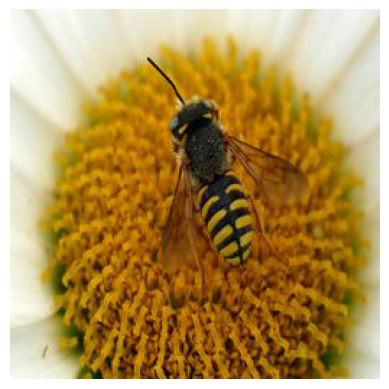

In [13]:
example_image_path = "flowers\\train\daisy\\48516641141_cd7f6ae645_c.jpg"
img=Image.open(example_image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

## Part 2 Pruning 

We also wrote a pruning part in the decision tree class, now we prune our existing tree according to our validation data. At the end of this process, the accuracy of our validation test should definitely increase, but we cannot know what result it will give in our test data. In addition, our pruned tree should now work faster or at the same time when making predictions because even in the worst-case scenario our tree remain the same but it will most likely shrink.

In [9]:
#Pruning process according to validation data
clf.prune(X_val, y_val)

In [10]:
start_time = time.time()
# Evaluate the performance of the model on the test data set
predictions = clf.predict(X_test)
end_time = time.time()
temp_time = end_time - start_time
avg_precision=0
avg_recall = 0
avg_f2=0
for class_label in range(10):  # For classes 0 to 10
    precision, recall, f2_score = calculate_precision_recall_f2(y_test, predictions, class_label)
    print(f"Class {flower_names[class_label]}: Precision = {precision}, Recall = {recall}, F2 Measure = {f2_score}")
    avg_precision += precision
    avg_recall += recall
    avg_f2 +=f2_score
accuracy = calculate_accuracy(y_test, predictions)

print("Test Accuracy:", accuracy, "Avarage Recall:",avg_recall/10.0,"Avarage Precision:",avg_precision/10.0,"Avarage f2 score:",avg_f2/10.0)

# Evaluating the performance of the model on the validation data set
start_time = time.time()
predictions_val = clf.predict(X_val)
end_time = time.time()
elapsed_time = (end_time - start_time) + temp_time
avg_precision=0
avg_recall = 0
avg_f2=0
for class_label in range(10):  # For classes 0 to 10
    precision, recall, f2_score = calculate_precision_recall_f2(y_val, predictions_val, class_label)
    print(f"Class {flower_names[class_label]}: Precision = {precision}, Recall = {recall}, F2 Measure = {f2_score}")
    avg_precision += precision
    avg_recall += recall
    avg_f2 +=f2_score
accuracy_val = calculate_accuracy(y_val, predictions_val)
print("Validation Accuracy:", accuracy_val, "Avarage Recall:",avg_recall/10.0,"Avarage Precision:",avg_precision/10.0,"Avarage f2 score:",avg_f2/10.0)




 
print(f"Elapsed time: {elapsed_time} seconds")

Class astilbe: Precision = 0.2608695652173913, Recall = 0.36, F2 Measure = 0.3025210084033614
Class bellflower: Precision = 0.15714285714285714, Recall = 0.22, F2 Measure = 0.18333333333333335
Class carnation: Precision = 0.12280701754385964, Recall = 0.14, F2 Measure = 0.1308411214953271
Class daisy: Precision = 0.20454545454545456, Recall = 0.18, F2 Measure = 0.1914893617021277
Class dandelion: Precision = 0.0851063829787234, Recall = 0.08, F2 Measure = 0.08247422680412371
Class iris: Precision = 0.15151515151515152, Recall = 0.1, F2 Measure = 0.12048192771084337
Class rose: Precision = 0.21739130434782608, Recall = 0.1, F2 Measure = 0.136986301369863
Class sunflower: Precision = 0.1111111111111111, Recall = 0.04, F2 Measure = 0.058823529411764705
Class tulip: Precision = 0.20512820512820512, Recall = 0.32, F2 Measure = 0.25
Class water_lily: Precision = 0.47540983606557374, Recall = 0.58, F2 Measure = 0.5225225225225224
Test Accuracy: 0.212 Avarage Recall: 0.21200000000000002 Avarag

Our tree formed after the pruning process worked slightly faster, and our validation accuracy increased and test accuracy decreased slightly.Because we pruned this tree according to validation data. Here, we were already expecting the accuracy rate of our validation data to increase. In addition, if our validation data and test data were similar, the accuracy rate in our test data could also increase, but since the images in our dataset were randomly taken from the internet, there was no standard, some of them were indistinguishable even to the human eye. So when we pruned the tree we just created a faster decision tree and more accurate for validation data.

In [11]:
def print_paths(root, path):
    if root is None:
        return

    # Append the current node to the path
    if root.is_leaf_node():
        path.append(root.value)
    else:
        path.append(root.threshold)

    # If it's a leaf node, print the path
    if root.left is None and root.right is None:
        print(" ".join(map(str, path)))
    else:
        # Traverse left and right subtrees
        print_paths(root.left, path)
        print_paths(root.right, path)

    # Remove the current node while backtracking
    path.pop()

The paths written here match the threshold values of the values by walking on these paths and matching the class label given at the end.

In [12]:
print("Root-to-Leaf Paths:")
print_paths(clf.root, [])

Root-to-Leaf Paths:
8717.0 3721.0 1622.0 43.38801574707031 1005.0 0.0 6
8717.0 3721.0 1622.0 43.38801574707031 1005.0 0.0 198.0 2
8717.0 3721.0 1622.0 43.38801574707031 1005.0 0.0 198.0 935.0 16.984100341796875 2
8717.0 3721.0 1622.0 43.38801574707031 1005.0 0.0 198.0 935.0 16.984100341796875 6
8717.0 3721.0 1622.0 43.38801574707031 1005.0 0.0 198.0 935.0 2
8717.0 3721.0 1622.0 43.38801574707031 1005.0 1280.0 38.803253173828125 11.270797729492188 1
8717.0 3721.0 1622.0 43.38801574707031 1005.0 1280.0 38.803253173828125 11.270797729492188 1
8717.0 3721.0 1622.0 43.38801574707031 1005.0 1280.0 38.803253173828125 41.97575378417969 2
8717.0 3721.0 1622.0 43.38801574707031 1005.0 1280.0 38.803253173828125 41.97575378417969 1
8717.0 3721.0 1622.0 43.38801574707031 1005.0 1280.0 32.537567138671875 2
8717.0 3721.0 1622.0 43.38801574707031 1005.0 1280.0 32.537567138671875 1424.0 3
8717.0 3721.0 1622.0 43.38801574707031 1005.0 1280.0 32.537567138671875 1424.0 6
8717.0 3721.0 1622.0 43.3880157470

The accuracy we found in the tree we created was not very high because our data was not suitable for this structure. Data is very important in machine learning. The machine learning algorithm appropriate to the given data should be selected. Since we pruned according to our validation data, our validation accuracy increased. Although the tree has become more general, it has become more suitable for our validation data, but it is possible that it will give lower accuracy on random data. After pruning, the execution speed of the code was not affected much, but it got better.

We can also use methods such as Canny Edge in the features section, but when we do this, we will still get similar results since we cannot separate flowers that have similar shapes. For example, flowers such as dandelion and daisy are similar in shape. When we start from the color intensity, some flowers have different colors, for example tulip and carnation. That's why, in almost every algorithm, we make a profit while making a loss. But when we use the Average Pixel Count and Edge Pixel Count features, we also save time, so we used these features.